# Introduction to Pandas

_Data Structures and Algorithms_

_Achyuthuni Sri Harsha_


---
In a previous notebook, we worked with the `numpy` library, which is the standard library for numeric manipulations in Python.

In this notebook, we will move to `pandas`, a library that builds on top of numpy with higher level structures to allow convenient and versatile data analysis. Here we will cover the use of pandas for loading data, representing it with common structures (pandas series and dataframes), and manipulating/accessing data within these structures. 

In the extra part of the notebook, we will briefly look at more complicated data operations such as merging data, and introduce the `scikit-learn` library for machine learning in Python.

---


## Pandas

Pandas builds on top of numpy and matplotlib to provide data analysis and statistical functionalities in Python. 

We will first introduce some core aspects of pandas using toy data, and then analyse a real data set. 

In [2]:
# # We import the numpy library to generate some random data.
# # Also the pandas library is imported.
import numpy as np
import pandas as pd

# # We fix the seed so that the results are reproducible.
# # Please do not change the seed below.
np.random.seed(seed=9)
# # Let's generate some toy data (sampled from a Gaussian distribution)
values = np.random.randn(100, 1)

Much of the work we do with pandas revolves around the use of _DataFrames_ to organize data. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet. If you've used R, chances are you've already used dataframes. The functionalities are very similar. The data structures in pandas build on and wrap around most popular data-types of python, e.g. lists, numpy arrays, so it's easy to move from one to another and call functions that work on a specific structure. 

In [3]:
# # Let's use the numpy vector that we created above to create a DataFrame.
dataframe = pd.DataFrame(data=values)


In [4]:
# # Pandas also includes most of the core methods/properties of a numpy array.
# # For instance, you can call get the shape the same way as in a numpy array.
print(dataframe.shape)

# # Few additional methods that are exactly the same (in the way you call them)
# # as in the numpy arrays are the max, min, median, mean, sum, std (standard 
# # deviation) methods.
print(dataframe.max())

# # The max value should be 2.45. But notice the result is not a simple value 
# # but a pandas data "series"
print('Result type:', type(dataframe.max()))

# # To get only the max value without the additional information, you 
# # could do: 
print(dataframe.max()[0])

(100, 1)
0    2.455183
dtype: float64
Result type: <class 'pandas.core.series.Series'>
2.4551826523000084


### Question 1: Dataframe summary

**A.** What is the min value of the dataframe?

**B.** What is the mean value of the dataframe?

**C.** Now create a new DataFrame named `dataframe_10k` that includes a vector of 10000 elements sampled from a Gaussian as above. What is the mean value now? **Hint** Remember to copy the same seed as above to ensure that you create the same array as in the test. The random.seed and the creation of the matrix should be in the same cell.

In [5]:
# Change the next line so that min_elem_df contains the min
# element of dataframe. 
# The expected result is ONLY the min value.
min_elem_df = dataframe.min()[0]

# Change the next line so that mean_elem_df contains the mean
# element of dataframe. 
# The expected result is ONLY the mean value.
mean_elem_df = dataframe.mean()[0]

In [6]:
# Please do not modify the line below (allows us to replicate the results).
np.random.seed(seed=9)

# The lines below concern part C of Question 1. 
# Modify the line below so that it creates the dataframe of 10k elements
# as mentioned in the description (part C above).
dataframe_10k = pd.DataFrame(np.random.randn(10000, 1))

# Change the next line so that mean_10k contains the mean
# element of dataframe_10k. 
mean_10k = dataframe_10k.mean()[0]

Now that we've seen how a DataFrame is initiated and some methods that it includes, you might wonder the benefits over using a numpy array. 

Here are some important differences between the two:

* A numpy array demands homogeneous data, while in a dataframe, different data types (float, string, datetime) are allowed in the same structure.
* Numpy is an amazing low-level tool for data manipulation, required by most other libraries (including pandas). However, pandas offers a  plethora of high-level functionality, e.g. grouping data by conditions (using the groupby method) and combining datasets with merge and join methods. We will see these methods later.
* The data (columns/rows) can have labels in pandas. In numpy the programmer needs to keep in mind the semantics of each column/row, while in dataframe they are explicitly coded in the structure.

Let's study an example that utilises some of these ideas. We'll create a small dataset of a few countries with the countries names, population, GDP, a d country codes. This sounds like a problem where we might use dictionary. Indeed the dictionary is convenient for housing this kind of data. However, data/number processing with a dictionary can be cumbersome.

In [8]:
d1 = {}
d1['countries'] = ['UK', 'France', 'Spain', 'Netherlands']
d1['codes'] = ['uk', 'fr', 'es', 'nl']
# # the population is measured in millions
d1['population'] = [65.6, 66.9, 46.6, 17.0]
# # the gdp is measured in billions
d1['gdp'] = [2619, 2465, 1232, 770]

In [9]:
# # Let's create a dataframe now with that data.
# # DataFrame includes a convenience constructor that
# # just accepts the dictionary data and creates
# # the same structure as in the previous example.
countries_data = pd.DataFrame(d1)

print(countries_data['gdp'])
countries_data # Notebook gives a nice HTML table of the dataframe

0    2619
1    2465
2    1232
3     770
Name: gdp, dtype: int64


,countries,codes,population,gdp
0,UK,uk,65.6,2619
1,France,fr,66.9,2465
2,Spain,es,46.6,1232
3,Netherlands,nl,17.0,770


In [10]:
# # Additionally, we can call the aggregation methods as above, but now we get
# # a result per column (which makes sense, we do not want to average
# # gdps together with populations).
countries_data.mean()

population      49.025
gdp           1771.500
dtype: float64

### Question 2: More summaries

**A.** What is the sum of the populations in the `countries_data`?

**B.** What is the standard deviation of the gdp's in the `countries_data`?

In [11]:
# Change the next line so that sum_pop_countries_data computes the sum of
# the populations from countries_data, rounded to one decimal.
sum_pop_countries_data = countries_data.sum()['population']

# Change the next line so that std_gdp_countries_data computes the standard deviation of
# the gdp from countries_data, rounded to one decimal.
std_gdp_countries_data = round(countries_data.std()['gdp'],1)

## File loading, data processing with Pandas

Now that you've become familiar with Dataframe, let's scale up our exploration and download a real dataset. We will use the Titanic dataset from the Kaggle Getting Started challenge at:

https://www.kaggle.com/c/titanic-gettingStarted

The dataset is included with as `titanic.csv`.

In [13]:
%matplotlib inline 
# make sure matplotlib plots display nicely in the Notebook

In [14]:
# # Let's load the first csv file. 
data = pd.read_csv('titanic.csv')

# # Printing the shape of the dataset we have just loaded.
print(data.shape)

# # The first step in data analysis is the exploration step.
# # We want to verify that a) our dataset is appropriately loaded,
# # b) get a sense of what values it has.
# # Let's display the 5 first rows:
data.head(5)
# # (When we run this in the Notebook, we will get a nice 
# #  HTML representation of the table.)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's extract some info from what we have just printed:

As you've noticed, each row has an id, starting from zero, and the data columns have names that help us categorise the values of the columns. For instance, the fourth column includes the names of the passengers and the sixth their ages. 
In the Cabin column, notice that there are some 'NaN' values. 'NaN' typically denotes a missing value in pandas.

Pandas includes a lot of built-in tools and methods that produce useful insights for our data. For instance:

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001563CA72BE0>]],
      dtype=object)

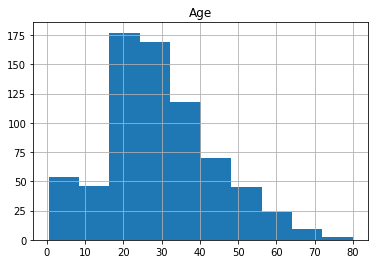

In [16]:
# # Pandas also allow us to plot values directly. 
# # Let's plot a histogram of the age of the passengers
# # pandas wraps around the relevant matplotlib function to directly do plotting. 
# # We could also import matplotlib as before
data.hist(column='Age')

For accessing a specific value of a column you can you use the at[] property or the get() method, like this:

```python
>>> data.at[0, 'Age']
22
>>> data.get('Age')
# the entire column
```

### Question 3: Accessing a dataframe

**A.** What is the age of the 10th passenger (i.e. PassengerId is 10)?

**B.** What is the cabin value for the 194th passenger?

In [17]:
data[data['PassengerId'] == 9].get(0,'Age')
data[data['PassengerId'] == 192].get(0,'Cabin')

'Cabin'

In [18]:
# Change the next line so that age_passenger_10 computes the age of
# the 10th passenger.
age_passenger_10 = data.at[9,'Age']

# Change the next line so that cabin_194_passenger computes the 
# cabin number of the 194th passenger.
cabin_194_passenger = data.at[193,'Cabin']

### Question 4: More accessing

Fill in the line of code below and then test it using the cell below.

In [20]:
# Change the next line so that it computes ticket number/id of
# the 100th passenger
ticket_i_th_passenger = data.at[99,'Ticket']

# We've put this line in this cell so that it will print
# the value you've given to ticket_i_th_passenger when you
# run it.  You don't need to change this.
ticket_i_th_passenger

'244367'

#### Data modification with pandas

In addition to parsing data, pandas can be used to modify data tables. We will go through a few common methods.

In [22]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# # Let's delete the first and the third 
# # passengers (remember the indexing in 
# # python starts from 0).
data.drop([0, 2], axis=0).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [24]:
# # Apart from that, you can also delete whole columns or rows.
# # For instance, for your problem, the Cabin column might be 
# # irrelevant, let's delete it.
data.drop(['Cabin'], axis=1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Let's now print the first five elements to check how the dataset looks like.

In [25]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Take a minute to consider what pandas have printed for you...

You might have observed, that the 'Cabin' column that we deleted above (the result showed it was deleted above) is still there. You will also notice, that even the elements that we deleted (passengers 1 and 3) are also re-added. Or were they never deleted in the first place? 

By default in pandas `drop` is not "inplace": in other words, the function returns you a *copy* while the original is untouched. However, since the copy is of the same type, you can assign it to a new variable, which will now contain only the reduced elements/columns.

In [26]:
# # Let's check that the data type is the same.
print(type(data))
# # What about the return type from a drop operation?
print(type(data.drop(['Cabin'], axis=1)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Question 5

Assign to the variable `reduced_data` the pandas matrix that does not include the columns of Cabin, Embarked and SibSp. Then execute the cell below for testing with the ok system.

In [27]:
# Change the next line so that it computes the reduced data matrix.
reduced_data = data.drop(['Cabin', 'Embarked', 'SibSp'], axis = 1)

# We've put this line in this cell so that it will print
# the value you've given to reduced_data when you
# run it.  You don't need to change this.
reduced_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500


Apart from deleting, you can also replace values by new ones. Remember that the main purpose of pandas is statistical computation, hence we often translate values to numbers that we know how to process. 

For instance, strings, such as 'male' or 'female' are not really useful for statistical analysis. We usually prefere to replace them with numerical values:

In [29]:
data.replace('male', 1).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


As with drop, the replace function returns a copy, so keep in mind that if you want to save them, you have to assign to a new variable.

In [30]:
# # An alternative way to replace the data is the following:
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})

In [31]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Let's now assume that from an external source, you figure out the Nationality of the passengers and want to insert that information. Pandas allow you to insert new rows, and in contrast with the aforementioned methods, this is an in-place operation. 

In [32]:
# # Right after the Sex, we want to include a new field named 'Nationality'. 
# # Since most of the passengers are Irish, we will by default assign 
# # the label 'Irish' to them and refine for those that are not.
data.insert(5, 'Nationality', 'Irish')

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Nationality,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,Irish,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Irish,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,Irish,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Irish,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,Irish,35.0,0,0,373450,8.0500,NaN,S


So far, we have replaced the values of a complete column, however what if we want to perform some modifications in specific values per row (e.g. if a condition is true)?

In [33]:
# # Let's assume for a moment that the nationality of 
# # those with Age NaN is Other European (hence why there 
# # are no records of their age).
# # We want to replace the default nationality with
# # their known nationality.
import numpy as np
for index, row in data.iterrows():
    if np.isnan(data.loc[index, "Age"]):
        data.loc[index, "Nationality"] = "European"

In [34]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Nationality,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,Irish,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Irish,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,Irish,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Irish,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,Irish,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,European,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,Irish,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,Irish,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,Irish,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,Irish,14.0,1,0,237736,30.0708,NaN,C


In [35]:
# # What we've done above is to replace some of the nationalities with 'European'. 
# # One property of pandas that we've utilised for that is the '.loc'.
# # Let's explore that a bit more: 
print(data.loc[3])

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                       1
Nationality                                           Irish
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object


As can be easily verified from the print above, this provides the whole row of the 4th passenger (as Python follows zero-based indexing). In other words, data.loc is a way to index a row or even a specific 'cell' inside the row as we did above with `data.loc[index, "Nationality"]'.

In [36]:
# # As typically done in higher level libraries in python, '.loc' offers a great deal of functionality. 
# # You can find furthr information by executing data.loc??
help(data.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series, DataFrame
 |    or Panel) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection 

We can filter dataframes directly:

In [37]:
european_bool = data['Nationality'] == 'European' # creates Booleans for each entry
print(european_bool.head(10))
# We could then pick only these records with 
europeans = data[european_bool]
# If we want to count different values, we can do 
data['Nationality'].value_counts()
# Counting how many non null values exist would be data['Nationality'].count()

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Nationality, dtype: bool


Irish       714
European    177
Name: Nationality, dtype: int64

## Optional exercises

### Question 6

**A.** Can you replace the nationalit column with numbers? For instance, try to assign values such that Irish = 0, Other European = 1. 

**B.** How many people of European nationality are there? (Following the assumption above for the NaN in the age)

**C.** For how many passengers do we have with Cabin information?


In [38]:
# Change the next line so that it computes the number of
# people with European nationality.
n_european = data['Nationality'].map({'Irish': 0, 'European': 1}).sum()

# Change the next line so that it computes the number of
# people for which we have cabin information.
n_passengers_cabin = len(data) - data['Cabin'].map({np.nan: 1}).sum()

### Question 7

Assign to the variable `only_pclass2` the pandas matrix that includes only the passengers with Pclass = 2. Then execute the cell below for testing with the ok system.

In [40]:
# Change the next line so that it computes a new dataframe
# that includes only the people with Pclass = 2.
# One way to use conditions in pandas is directly with data[CONDITION]
only_pclass2 = data[data['Pclass'] == 2]

# We've put this line in this cell so that it will print
# the value you've given to only_pclass2 when you
# run it.  You don't need to change this.
only_pclass2.head()

,PassengerId,Survived,Pclass,Name,Sex,Nationality,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,Irish,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",1,Irish,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",0,European,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",0,Irish,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",0,Irish,34.0,0,0,248698,13.0000,D56,S


## Extra part: More Titanic

The session folder contains the files `titanic.csv` and `nationalities.csv`. The latter file contains nationalities of Titanic passengers. Note that this file was created solely for the purpose of learning within this course, and should not be used outside of the scope of the course. It does **not** reflect the real nationalities of the passengers.

Load the files titanic.csv and nationalities.csv in the variables `data_org` and `data_nat` respectively. Use the cell below as instructed.

In [42]:
import pandas as pd

In [43]:
# Reads the file titanic.csv
data_org = pd.read_csv('titanic.csv')

# Reads the file nationalities.csv
data_nat = pd.read_csv('nationalities.csv')

## Advanced pandas dataframe processing

When working on data analysis, we often need to combine information from different sources, or produce our own data and then combine them with other sources. The pandas library offers a great deal of methods to facilitate this process. We will study below the functionality of merging datasets. We will merge the titanic.csv (original file) and the nationalities.csv (data produced by our research). 

Before merging two datasets, we need to know exactly how these datasets are related, how they are structured and whether they already have some common fields.

In [44]:
# # First, let's ensure that the two datasets have the same number of elements (passenger data).
assert data_org.shape[0] == data_nat.shape[0]

In [45]:
# # Let's print the heads of the two datasets to figure out if there are any common elements.
data_org.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data_nat.head(5)

,PassengerId,Nationality
0,1,Swede
1,2,Austro Hungarian
2,3,Swede
3,4,Belgian
4,5,Swede


In [47]:
# # We are ready to perform the merging. Observe that the datasets share a common column in
# # the PassengerId, so we will use it to combine the data.
data_new = data_org.merge(data_nat, on='PassengerId')

# # Let's see what we've created now.
data_new.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nationality
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Swede
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Austro Hungarian
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Swede
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Belgian
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Swede


In [48]:
# # Pandas offers several convenient methods for conditional selection and actions on them.
# # For instance, above, we worked on getting useful aggregate statistics
# # over the whole dataset (do you remember the commands?).
# # However, often we'd like to select only a subset of the data based on some condition. 
# # For instance, let's say we would like to print the average age per class.
# # One way to do that would be to iterate over all the elements, create a list, sum them 
# # and then compute the average. 
# # But pandas conveniently allows us to do it with a single command. 
# # It works as follows: 
# # First we group the data by the class, then we ask pandas to compute the mean of the age.
print(data_new.groupby(['Pclass'])['Age'].mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [49]:
# # In the command above, we've averaged both men and women based only on the Pclass.
# # However, we could separate the two sexes and compute the mean for each sex.
print(data_new.groupby(['Pclass', 'Sex'])['Age'].mean())

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64


You might have noted that in class three, the average age of each sex differs significantly with the mean being closer to the male average age. Intuitively, you expect to find more men in that class than women. However, what is the command to find the exact number of males in this class? 

In [50]:
# # We will now drop few columns that contain strings to mention few methods for statistical processing.
data = data_new.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'Nationality', 'Sex'], axis=1)

In [51]:
# # As we've seen, pandas bundles much of the functionality of numpy and lists.
# # We can for example "clip" the values, i.e. restrict them in a chosen interval.
# # Notice that some values were greater than our upper bound, but are now
# # restricted to the maximum upper bound we set.
data.clip(lower=0, upper=40).head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.250
1,2,1,1,38.0,1,0,40.000
2,3,1,3,26.0,0,0,7.925
3,4,1,1,35.0,1,0,40.000
4,5,0,3,35.0,0,0,8.050


In [52]:
# # If the method we would like to apply to the data does not exist, we can use the 
# # '.apply' method that allows us to choose any function to be applied to each record.
# # One way to do this is through an "anonymous" lambda function.
# # This works as defining a function without an explicit name to apply to each record
import numpy as np
data["SurvivedPlusOne"] = data["Survived"].apply(lambda x: x + 1)
data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SurvivedPlusOne
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,2
2,3,1,3,26.0,0,0,7.9250,2
3,4,1,1,35.0,1,0,53.1000,2
4,5,0,3,35.0,0,0,8.0500,1


**Exercise**. Who survived? Use the aggregation functions above to calculate survival probabilities based on fare classes, age, or fare paid.


## Extra topic: Introduction to Machine Learning

#### Introduction

We can think of Machine Learning (ML) as a way to simulate a function. Not necessarily a function with the strict mathematical sense of calculus courses, but rather a function that maps some (optional) input to some output. 

For instance, translating English to German can be thought as a function that maps text in the English language to the respective text into German. Let's think about that for a minute: The naive approach is to translate word by word, e.g. having a python dictionary with keywords the english words and the respective value to be a german word. However, this approach would lose most of the language's syntax, the connections and the higher level representations of the text. Machine-learning based translation tools seek to bridge this cap and are a very active field in Machine Learning research. 

Machine Learning approaches typically use some **tunable parameters** (typically an array of floating point values) that are adjusted (learnt) so as to improve their behaviour by **adapting to previously seen data.**

Depending on the ML application, you can have different dimensions of data. For example, in image processing, they typically deal with 2D arrays of shape  ``[n_samples x n_features]``. The number of features is the same for each object, and each feature column refers to a related piece of information about each sample. In financial analysis, you also deal with 2D arrays where n_features would be the number of observations in a time series, e.g. the stock price of a company for the past several years. The different samples would then refer to different companies. 

Machine-learning methods are often divided into *supervised learning* and *unsupervised learning*.

Supervised learning relies on having some labelled sample data as input, and training a model to analyse new instances of related data. For example, we might have pictures of different individuals and label each picture with the person who's in the photo, and then train an algorithm to classify new pictures. 

Unsupervised learning, in contrast, does not require any labelled samples to learn. With the photos, we might instead use unsupervised learning to try to divide our pictures into groups of different people without any upfront labelling. 

---

#### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of different **features and labels**.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. Some examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).
- given observations from a site (e.g. sensors' input), figure out
  whether the facility works as predicted or there are 
  some disruptions (this task is alleged "anomaly detection").

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

---

Both regression and classification are some tasks essential in several fields that require data analysis (e.g. financial analysis). Some examples are:
- given historical observations of the house market prices, predict the future values.
- given the offers (for outsourcing product $y$ creation) from $v$ different companies, decide with which company to collaborate. 
- given a history of stock market prices, predict whether there is a disruptive event at some time $t$. 

There are no tests for these exercises.

**Exercise.** What type of problem (classification/regression) is the one with house market prices?  
Regression  

**Exercise.** What about the offers for outsourcing the product creation?  
Classification  

**Exercise.** What type of problem is the prediction of disruptive events in stock market?
Regression  

#### Scikit learn
We'll use a popular machine-learning library called **Scikit learn**. 
You can start using scikit straight away, as the API is intuitive and well documented. They also offer a plethora of more advanced options if you want to customise the parameters of the optimisation problem.

In this tutorial, we focus on regression.  We'll begin with the most standard regression setting: the linear regression one.

In [53]:
# # We import only the LinearRegression class.
from sklearn.linear_model import LinearRegression
import numpy as np
# # Import the modules for printing
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# # If you want to check out the documentation, 
# # you can call help().
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, o

In [55]:
# # Let's initialise a new Linear Regression model.
model = LinearRegression(normalize=True)

In [56]:
# # In most python libraries, you can print the objects and
# # acquire information about their class/parameters.
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


#### Elaborate on 'Parameters', please...
At this point, we should clarify the use of the term **parameters**. 

In the `help` command a few cells above, you might have noticed that under the title 'Parameters' are the arguments of the class. Those are the programming parameters, provided by the programmer. Those are often called **hyper-parameters**. 

However, when we mentioned above that ML applications include parameters that are learnt, we did not mean the hyper-parameters that are decided (semi-)automatically. What we meant with **tunable parameters** were the model's parameters. Every model requires different parameters, e.g. a simple linear regression of 1D data has the following two parameters: the slope and the intercept.

In [57]:
# # starting from some toy data to get familiar with the concepts:
X = np.array([[0],
              [1],
              [2]]) # A 2D array with 3 samples of 1 feature each
y = np.array([[0, 1, 2 ]]).T # What we want to predict as a function of X
# # Hint: This is the identity function.

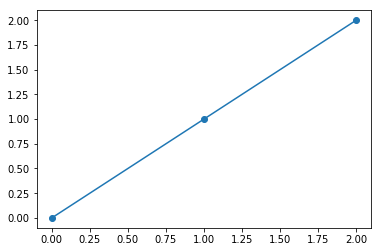

In [58]:
# # Let's plot to verify that we've defined the identity function.
_ = plt.plot(X[:, 0], y, marker='o')

In [59]:
# # Let's fit the Linear regression model we've defined above.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [60]:
# # It was that simple. We call the method fit, provide 
# # the training samples and the model "learns" the parameters.
# # Let's now print the coefficient learnt for this case:
model.coef_

array([[1.]])

---

Now, it's time to move to a more useful example. We will be given some samples X (1D) and try to estimate the linear line that created them. 

In [61]:
# # The seed below is significant for reproducible results.
np.random.seed(0)

X = np.random.random(size=(20, 1))
y = 3 * X[:, 0] + 2 + np.random.normal(size=20)

In [62]:
# # Fit linear regression to it.
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
m1 = 'Model coefficient: {}, and intercept: {}'
print(m1.format(model.coef_, model.intercept_))

Model coefficient: [3.93491126], and intercept: 1.4622907890393395


In [63]:
# # Let's now generate some new samples (UNSEEN in the training)
# # and use those to predict the y values.
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)

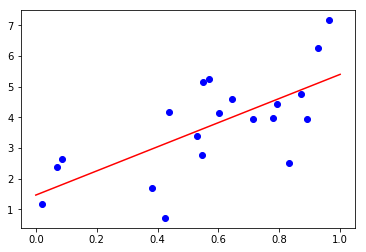

In [64]:
# Let's plot with blue dots the 'training' points, while with a red line the
# estimated line.
plt.plot(X, y, 'bo')
plt.plot(X_test, y_test, 'r')

What happens if you increase the number of training points from 100 to 10K?

#### A recap on Scikit-learn's estimator interface

As you have observed, scikit-learn provides a uniform interface across all methods.In the case of regression, the main functions you will need are:

+ `model.fit()` : fit training data. For supervised learning applications,
this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
For unsupervised learning applications, this accepts only a single argument,
the data `X` (e.g. `model.fit(X)`).
+ `model.predict()` : given a trained model, predict the label of a new set of data.
This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
and returns the learned label for each object in the array.
+ `model.score()` : for classification or regression problems, most (all?) estimators implement
a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.


We've now seen how to fit a standard linear regression model with scikit-learn. For statistical analysis, such as hypothesis testing, we would often use another library called [statsmodels](http://www.statsmodels.org/stable/index.html).

Now, let's work through a machine-learning application with the Titanic dataset.

### Machine learning task: Predict survival

We will employ the Titanic data to predict the chance of survival of the passengers. In other words, the goal of the this part is to predict whether a passenger survived based on other known attributes. This is a very brief introduction and we will not go through all details of the models. When you see a model or a command you're not familiar with, it's a good idea to try to search online for what it does.

In [65]:
import pandas as pd
import numpy as np

In [66]:
data = pd.read_csv('titanic.csv')

In [67]:
survived_column = data['Survived']
survived_column.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In other words, the value is 1 if the person survived, 0 otherwise.

In [68]:
# Let's use the groupby as we used it above to get the survivors per category:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [69]:
np.mean(survived_column == 1)

0.3838383838383838

In other words, ~38% of the people survived. Let's convert the values of survived into a numpy arrays (input to scikit-learn).

`sklearn` estimators all work with homegeneous numerical feature descriptors passed as a numpy array. Therefore passing the raw data frame will not work out of the box.

Let us start simple and build a first model that only uses readily available numerical features as input, namely `data.Fare`, `data.Pclass` and `data.Age`.

In [70]:
target = survived_column.values
numerical_features = data[['Fare', 'Pclass', 'Age']]
numerical_features.head(10)

,Fare,Pclass,Age
0,7.2500,3,22.0
1,71.2833,1,38.0
2,7.9250,3,26.0
3,53.1000,1,35.0
4,8.0500,3,35.0
5,8.4583,3,NaN
6,51.8625,1,54.0
7,21.0750,3,2.0
8,11.1333,3,27.0
9,30.0708,2,14.0


A slight issue is that passenger 6 has an age 'NaN', which will not be recognised from sklearn. In general, the first step of any machine learning application is to pre-process the data. 

Typically, the data are (un)normalised, in a different format than your library requires them, etc. So, you will need to take care that they include the right values at first, otherwise you might end up spending hours trying to understand why the trained models return non-sensical results. 

In [71]:
median_features = numerical_features.dropna().median()
median_features

Fare      15.7417
Pclass     2.0000
Age       28.0000
dtype: float64

Now use this value to replace the missing ones:

In [72]:
imputed_features = numerical_features.fillna(median_features)
imputed_features.count()

Fare      891
Pclass    891
Age       891
dtype: int64

Now that the data frame is clean, we can convert it into an homogeneous numpy array of floating point values:

In [73]:
features_array = imputed_features.values

We have 891 samples: let us keep 700 for training our model and the rest to test the quality of said model

In [74]:
X_train = features_array[:700, :]
X_test = features_array[700:, :]

In [75]:
# It's always a good idea to verify that your data have the expected shape
print(X_train.shape)
print(X_test.shape)

(700, 3)
(191, 3)


In [76]:
y_train = target[:700]
y_test = target[700:]

Now we can finally apply a regression model! We'll use [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), common for modelling binary data such as survivals.

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1.)
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
target_predicted = logreg.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, target_predicted)

0.7277486910994765

72 percent accuracy, not **too** bad...

### Model evaluation and interpretation

#### Interpreting linear model weights

The `coef_` attribute of a fitted linear model such as `LogisticRegression` holds the weights of each features:

In [80]:
feature_names = numerical_features.columns
feature_names

Index(['Fare', 'Pclass', 'Age'], dtype='object')

In [81]:
logreg.coef_

array([[ 0.00340844, -0.80203374, -0.03071402]])

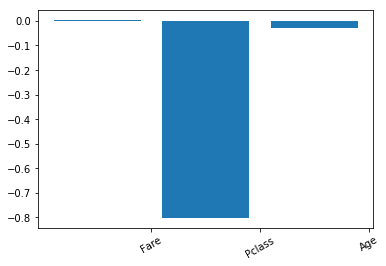

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(len(feature_names))
plt.bar(x, logreg.coef_.ravel())
_ = plt.xticks(x + 0.5, feature_names, rotation=30)

In this case, survival is slightly positively linked with Fare (the higher the fare, the higher the likelyhood the model will predict survival) while passenger from first class and lower ages are predicted to survive more often than older people from the 3rd class.

First-class cabins were closer to the lifeboats and children and women reportedly had the priority. Our model seems to capture that historical information. 

That's your first machine-learning algorithm. Even though you can build much more powerful models, standard linear (or logistic) regression is often remarkably effective for providing an understanding of the complexity of your data. That is, if this error is already quite small with the linear regression model, then you might as well use that.

For a much more detailed introduction to machine learning in Python, see
- The Python Data Science Handbook, Chapter 5, https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.00-Machine-Learning.ipynb
